In [1]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip -qq '/content/drive/My Drive/cifar10.zip'

In [3]:
!pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-_zcbcink
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-_zcbcink
  Running command git submodule update --init --recursive -q
  Stored in directory: /tmp/pip-ephem-wheel-cache-etlogdpx/wheels/de/2b/fd/29a6d33edb8c28bc7d94e95ea1d39c9a218ac500a3cfb1b197
Successfully built image-classifiers


In [4]:
import keras
import random
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from classification_models.resnet import ResNet18, preprocess_input

Using TensorFlow backend.


In [0]:
TRAIN_DIR = 'cifar10/train/'
TEST_DIR = 'cifar10/test/'
batch_size = 64
IMG_SIZE = 32

n_classes = 10

In [6]:
# build model
base_model = ResNet18(input_shape=(IMG_SIZE, IMG_SIZE,3), weights='imagenet', include_top=False)
x = keras.layers.Conv2D(n_classes, (1,1), strides=(1,1))(base_model.output)
x = keras.layers.GlobalAveragePooling2D()(x)
output = keras.layers.Activation('softmax')(x)
model = keras.models.Model(inputs=[base_model.input], outputs=[output])

# train
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
# model.fit(X, y)

W0702 13:23:50.170776 140242355033984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0702 13:23:50.232271 140242355033984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0702 13:23:50.233766 140242355033984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0702 13:23:50.235443 140242355033984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0702 13:23:50.236899 140242

44924928/44920640 [==============================] - 1s 0us/step


W0702 13:23:57.366089 140242355033984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [7]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True, validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
        target_size = (IMG_SIZE, IMG_SIZE),
        color_mode = 'rgb',
        batch_size = batch_size,
        class_mode = 'categorical',
        shuffle = True, subset='training')

valid_generator = train_datagen.flow_from_directory(TRAIN_DIR,
        target_size = (IMG_SIZE, IMG_SIZE),
        color_mode = 'rgb',
        batch_size = batch_size,
        class_mode = 'categorical',
        shuffle = True, subset='validation')

test_generator = test_datagen.flow_from_directory(TEST_DIR,
        target_size = (IMG_SIZE, IMG_SIZE),
        color_mode = 'rgb',
        batch_size= 1,
        class_mode = 'categorical',
        shuffle = False)

Found 40000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [8]:
model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.n//batch_size,
        epochs=20,
        validation_data=valid_generator,
        validation_steps=valid_generator.n//batch_size)

W0702 13:24:12.515540 140242355033984 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
625/625 [==============================] - 67s 108ms/step - loss: 1.1927 - acc: 0.5869 - val_loss: 0.8773 - val_acc: 0.6961
Epoch 2/20
625/625 [==============================] - 61s 98ms/step - loss: 0.8047 - acc: 0.7201 - val_loss: 0.7499 - val_acc: 0.7371
Epoch 3/20
625/625 [==============================] - 61s 97ms/step - loss: 0.6898 - acc: 0.7598 - val_loss: 0.6824 - val_acc: 0.7624
Epoch 4/20
625/625 [==============================] - 62s 99ms/step - loss: 0.6220 - acc: 0.7799 - val_loss: 0.6309 - val_acc: 0.7823
Epoch 5/20
625/625 [==============================] - 62s 100ms/step - loss: 0.5683 - acc: 0.7994 - val_loss: 0.6110 - val_acc: 0.7881
Epoch 6/20
625/625 [==============================] - 62s 99ms/step - loss: 0.5225 - acc: 0.8156 - val_loss: 0.6027 - val_acc: 0.7945
Epoch 7/20
625/625 [==============================] - 61s 97ms/step - loss: 0.4881 - acc: 0.8284 - val_loss: 0.5911 - val_acc: 0.7944
Epoch 8/20
625/625 [==============================] - 60s 97

In [0]:
import os
ROOT_DIR = '/content/drive/My Drive'

if not os.path.exists(ROOT_DIR + '/cifar10logs'):
  os.mkdir(ROOT_DIR + '/cifar10logs')

MOD_DIR = '/content/drive/My Drive/cifar10logs'

model.save(MOD_DIR+'/model.h5')



In [10]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn0 (Batch

In [11]:
model.evaluate_generator(test_generator, workers=1, verbose=1, steps=test_generator.n//1)

10000/10000 [==============================] - 110s 11ms/step


[0.5895728579716105, 0.8249]

In [12]:
test_generator.reset()
pred=model.predict_generator(test_generator,verbose=1, steps=test_generator.n//1)

10000/10000 [==============================] - 106s 11ms/step


In [0]:
predicted_class_indices=np.argmax(pred,axis=1)
y_true = test_generator.classes

assert(y_true.shape == predicted_class_indices.shape)

In [14]:
wrong = []
correct = []
for i in range(y_true.shape[0]):
    if predicted_class_indices[i] != y_true[i]:
        wrong.append(i)
    elif predicted_class_indices[i] == y_true[i]:
        correct.append(i)
        
print(len(wrong))
print(len(correct))

1751
8249


In [15]:
misc_names = []
correct_names = []

for i in wrong:
    name = test_generator.filenames[i]
    misc_names.append(name)

for i in correct:
    name = test_generator.filenames[i]
    correct_names.append(name)
  
print(len(misc_names))
print(len(correct_names))

1751
8249


In [16]:
wrng_samples = random.sample(misc_names, 50)
print(len(wrng_samples))

50


In [0]:
from keras.preprocessing import image
import keras.backend as K
import cv2
from google.colab.patches import cv2_imshow

for a in range(len(wrng_samples)):

    img_name = wrng_samples[a]

    img_path = TEST_DIR + '/' + img_name
    img = image.load_img(img_path)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    class_idx = np.argmax(preds[0])
    class_output = model.output[:, class_idx]
    last_conv_layer = model.get_layer("zero_padding2d_17")
    #last_conv_layer = base_model

    grads = K.gradients(class_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([x])
    for i in range(64):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]


    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
    if not os.path.exists(MOD_DIR + '/images'):
        os.mkdir(MOD_DIR + '/images')
    cv2.imwrite(MOD_DIR + '/images'+'/'+str(a)+'.jpg', superimposed_img)

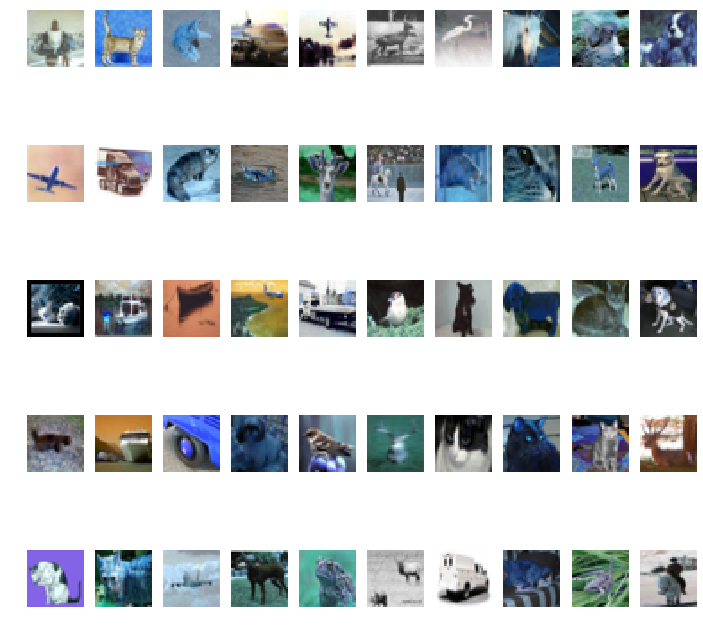

In [32]:
from glob import glob
import matplotlib.pyplot as plt

## Mis-classified Samples

w=10
h=10
fig=plt.figure(figsize=(12,12))
columns = 10
rows = 5
for i in range(1, columns*rows +1):
    img = cv2.imread(TEST_DIR + '/' + wrng_samples[i-1])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis('off')
plt.show()

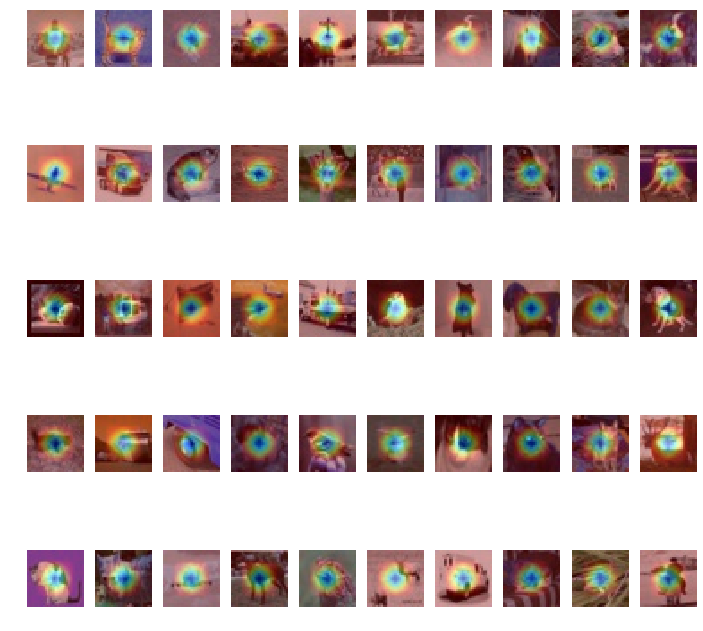

In [31]:
## GradCam Samples for the above

im_list = glob(MOD_DIR+'/images/*.jpg')

w=10
h=10
fig=plt.figure(figsize=(12,12))
columns = 10
rows = 5
for i in range(1, columns*rows +1):
    img = cv2.imread(im_list[i-1])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis('off')
plt.show()

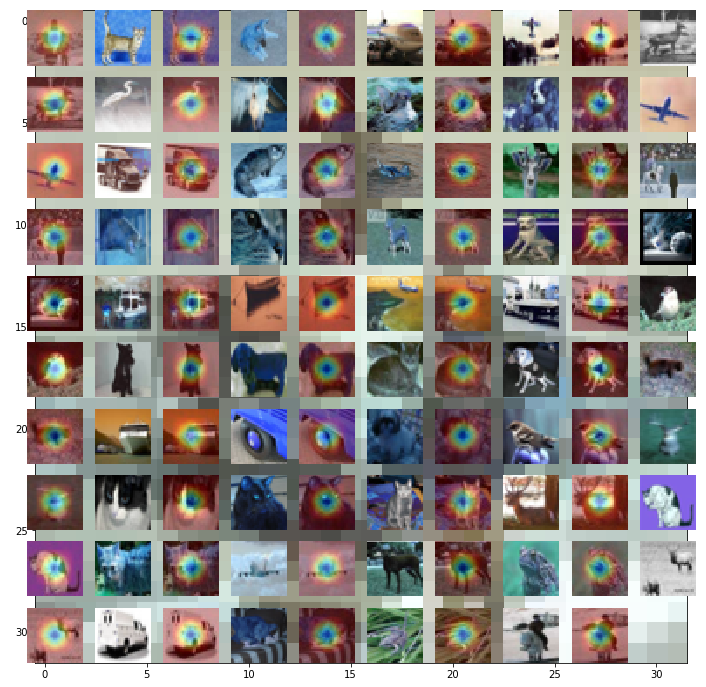

In [34]:
im_list = glob(MOD_DIR+'/images/*.jpg')

w=10
h=10
fig=plt.figure(figsize=(12,12))
columns = 10
rows = 10

odd = 0
even = 0

for i in range(1, columns*rows +1):
    if i%2 != 0:
        img = cv2.imread(TEST_DIR + '/' + wrng_samples[odd])
        plt.imshow(img)
        odd +=1
    else:
        imgs = cv2.imread(im_list[even])
        plt.imshow(imgs)
        even +=1
    fig.add_subplot(rows, columns, i)
    
    plt.axis('off')
plt.show()